In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf 
from scipy.interpolate import make_smoothing_spline

In [6]:
# Get options data from yfinance
ticker = yf.Ticker("SPY")  # Replace with your desired ticker

# Get available expiration dates
expiration_dates = ticker.options
print("Available expiration dates:", expiration_dates)

# Get options chain for a specific expiration date
opt_chain = ticker.option_chain(expiration_dates[0])

# Access calls and puts separately
calls = opt_chain.calls
puts = opt_chain.puts

print("\nCalls data:")
print(calls.head())
print("\nPuts data:")
print(puts.head())

Available expiration dates: ('2025-12-26', '2025-12-29', '2025-12-30', '2025-12-31', '2026-01-02', '2026-01-09', '2026-01-16', '2026-01-23', '2026-01-30', '2026-02-20', '2026-02-27', '2026-03-20', '2026-03-31', '2026-04-30', '2026-05-29', '2026-06-18', '2026-06-30', '2026-09-18', '2026-09-30', '2026-12-18', '2027-01-15', '2027-03-19', '2027-06-17', '2027-12-17', '2028-01-21', '2028-06-16')

Calls data:
       contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0  SPY251226C00400000 2025-12-01 20:58:11+00:00   400.0     280.30  288.58   
1  SPY251226C00410000 2025-11-11 18:44:28+00:00   410.0     274.82  278.58   
2  SPY251226C00415000 2025-12-22 14:33:31+00:00   415.0     269.05  273.63   
3  SPY251226C00420000 2025-12-15 15:53:35+00:00   420.0     261.27  268.60   
4  SPY251226C00425000 2025-11-25 19:55:30+00:00   425.0     250.02  263.67   

      ask  change  percentChange  volume  openInterest  impliedVolatility  \
0  291.38     0.0            0.0     NaN        

In [10]:
cv = calls['impliedVolatility']
K  = calls['strike']

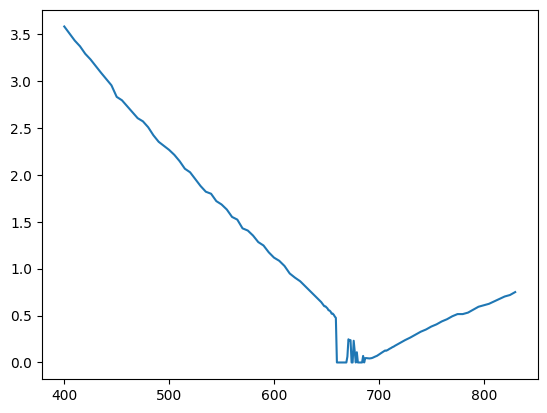

In [11]:
plt.plot(K,cv)

In [15]:
ss = make_smoothing_spline(K,cv)

In [30]:
ss(K)


array([3.57939315e+00, 3.43286483e+00, 3.36390353e+00, 3.29405413e+00,
       3.22710529e+00, 3.08999123e+00, 2.93815789e+00, 2.85188674e+00,
       2.78437354e+00, 2.61101602e+00, 2.56187207e+00, 2.49977065e+00,
       2.42545247e+00, 2.35852423e+00, 2.26191920e+00, 2.20814791e+00,
       2.14323638e+00, 2.07623440e+00, 2.01567486e+00, 1.88301593e+00,
       1.82819316e+00, 1.78267478e+00, 1.73031172e+00, 1.67962062e+00,
       1.62391595e+00, 1.56304138e+00, 1.50627057e+00, 1.44662595e+00,
       1.39835218e+00, 1.34781824e+00, 1.29164471e+00, 1.23696520e+00,
       1.17799435e+00, 1.12430525e+00, 1.07691839e+00, 1.02110918e+00,
       9.58286865e-01, 9.05814655e-01, 8.60055902e-01, 8.09581172e-01,
       7.54421745e-01, 6.98295677e-01, 6.45268154e-01, 6.16856006e-01,
       6.07957010e-01, 5.98821170e-01, 5.88645211e-01, 5.76293608e-01,
       5.60233307e-01, 5.38454384e-01, 5.08726306e-01, 4.68896048e-01,
       4.17290225e-01, 3.53731833e-01, 2.80707324e-01, 2.04705964e-01,
      

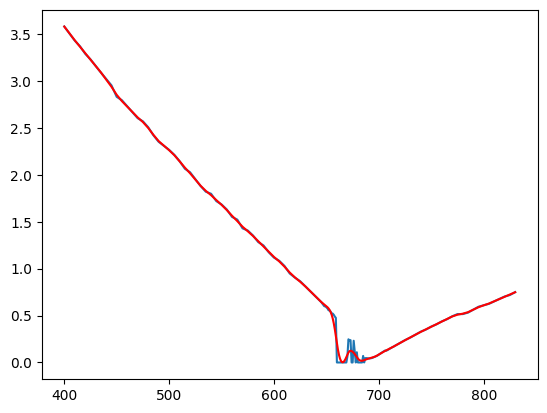

In [34]:
plt.plot(K,cv)
plt.plot(K,ss(K), color = 'red')
plt.show()

In [54]:
# Now i can use the cov formula to back out the implied distribution
# Need to get the derivative of ss
derivative_ss = ss.derivative(nu= 2) #(this is just the function)
deriv_at_K = derivative_ss(K)


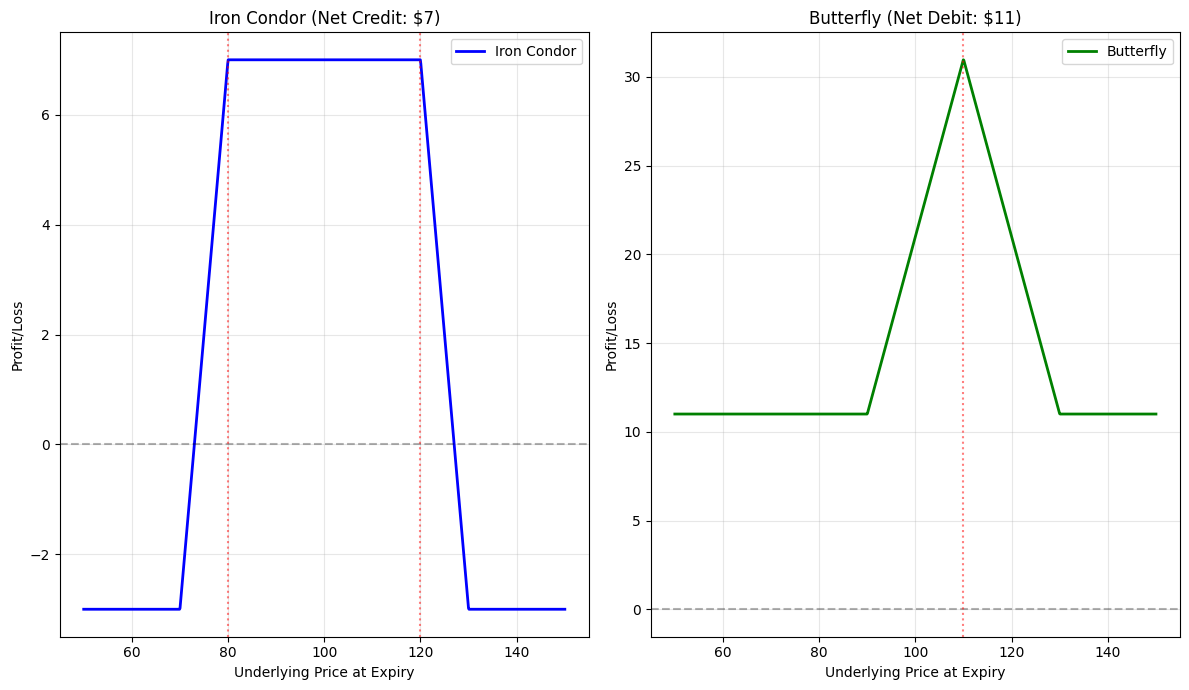

KEY DIFFERENCES:
Iron Condor - Max Profit: $7.00
Iron Condor - Max Loss: $-3.00
Iron Condor - Profit Range: $80 to $120

Butterfly - Max Profit: $30.96
Butterfly - Max Loss: $11.00
Butterfly - Profit at: $110


: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Underlying price grid
S = np.linspace(50, 150, 1000)

# ---------- IRON CONDOR ----------
# Structure: Sell put spread + Sell call spread
# Short put at 80, Long put at 70 (put spread)
# Short call at 120, Long call at 130 (call spread)
Kp_short = 80
Kp_long  = 70
Kc_short = 120
Kc_long  = 130

# Premiums collected/paid
premium_put_short = 6
premium_put_long  = 2
premium_call_short = 5
premium_call_long  = 2

net_credit_condor = (premium_put_short - premium_put_long + 
                     premium_call_short - premium_call_long)

# Payoff at expiration
payoff_condor = (
    net_credit_condor
    - np.maximum(Kp_short - S, 0)  # Short put
    + np.maximum(Kp_long - S, 0)   # Long put
    - np.maximum(S - Kc_short, 0)  # Short call
    + np.maximum(S - Kc_long, 0)   # Long call
)

# ---------- BUTTERFLY ----------
# Structure: Buy 1 low call, Sell 2 mid calls, Buy 1 high call
K_low = 90
K_mid = 110
K_high = 130

premium_low = 4
premium_mid = 9
premium_high = 3

net_debit_bfly = premium_low - 2 * premium_mid + premium_high

# Payoff at expiration
payoff_bfly = (
    np.maximum(S - K_low, 0)
    - 2 * np.maximum(S - K_mid, 0)
    + np.maximum(S - K_high, 0)
    - net_debit_bfly
)

# ---------- PLOT COMPARISON ----------
plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
plt.plot(S, payoff_condor, label="Iron Condor", linewidth=2, color='blue')
plt.axhline(0, color='black', linestyle='--', alpha=0.3)
plt.axvline(Kp_short, color='red', linestyle=':', alpha=0.5)
plt.axvline(Kc_short, color='red', linestyle=':', alpha=0.5)
plt.xlabel("Underlying Price at Expiry")
plt.ylabel("Profit/Loss")
plt.title(f"Iron Condor (Net Credit: ${net_credit_condor})")
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(S, payoff_bfly, label="Butterfly", linewidth=2, color='green')
plt.axhline(0, color='black', linestyle='--', alpha=0.3)
plt.axvline(K_mid, color='red', linestyle=':', alpha=0.5)
plt.xlabel("Underlying Price at Expiry")
plt.ylabel("Profit/Loss")
plt.title(f"Butterfly (Net Debit: ${-net_debit_bfly})")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ---------- KEY DIFFERENCES ----------
print("KEY DIFFERENCES:")
print(f"Iron Condor - Max Profit: ${net_credit_condor:.2f}")
print(f"Iron Condor - Max Loss: ${min(payoff_condor):.2f}")
print(f"Iron Condor - Profit Range: ${Kp_short} to ${Kc_short}")
print()
print(f"Butterfly - Max Profit: ${max(payoff_bfly):.2f}")
print(f"Butterfly - Max Loss: ${min(payoff_bfly):.2f}")
print(f"Butterfly - Profit at: ${K_mid}")